# Rain Event Finder -- Concrete
The purpose of this notebook is to identify rain events from raw data files, and provide the corresponding rainfall (in mm) and volume flow (in liters). Hopefully this won't get too technical!
<p>The most important things:

1. Make sure that you have a csv file, not an excel file. That csv file should contain data regarding rainfall and flow rate.
2. always use quotes ("" or '') when passing in column names to functions. I chose to use single quotes, but it doesn't matter. Row names do not need quotes.
3. In order to load, or run, each cell, hold the "shift" key and then press "return" or 'Enter'. The cell that will be run is the one highlighted by blue on the left. You can select any cell by clicking anywhere in it.
4. You might need to comment certain lines out. I have certain "default" lines that should do all the work for us, but if you want to use some of my functions in a different way, then commenting things may be useful. Simply stick a "#" in front of the line (you'll see that I've done this with several lines). Similarly, to un-comment a line, just remove the '#'

Load the following cell:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp
from datetime import datetime
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 1000)

In order to import our data, replace '2019-2020 asphalt vs rain.csv' with the name of your data file. Make sure that the csv file is in the same folder that this file, rain_event_finder.ipynb is in. You can check http://localhost:8888/tree/idea_school to make sure that the correct csv file is in the same folder as this file. I have '2019-2020 asphalt vs rain.csv' as the default, but your file may have a different name.
## Checkpoint 1
<B> If you feel like you have royally screwed up, come back to this cell! <b>

In [3]:
df = pd.read_csv('2019-2020 concrete vs rain.csv')
df

,Unnamed: 0,TOA5 idea concrete cr 1000,IDEA_Concrete_cell,CR1000,91194,CR1000.Std.32.03,CPU:Concrete_20190329.CR1,430,Hydro,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Rain_in_Tot,TIMESTAMP,CnoC_Level_Avg,CC_Level_Avg,CnoC_Stage_Avg,CC_Stage_Avg,CnoC_Flow_Avg,CC_Flow_Avg,CnoC_Sample_Pulses_Max,CC_Sample_Pulses_Max,CnoC_GoodSample_Max,CC_GoodSample_Max,NaN,NaN
1,In,TS,Ft,Ft,Ft,Ft,GPM,GPM,Pulses,Pulses,Samples,Samples,NaN,NaN
2,Tot,NaN,Avg,Avg,Avg,Avg,Avg,Avg,Max,Max,Max,Max,NaN,NaN
3,0,9/1/2019 0:00,0.7708926,1.07721,-0.06738803,-0.02018468,0,0,17,1348,0,1,NaN,NaN
4,0,9/1/2019 0:05,0.770869,1.077457,-0.06741168,-0.01993769,0,0,17,1348,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42154,0,1/25/2020 11:45,0.8233956,1.076244,-0.01499835,-0.02115051,0,0,0,33,0,33,NaN,NaN
42155,0,1/25/2020 11:50,0.8232036,1.076341,-0.01519027,-0.02105389,0,0,0,33,0,33,NaN,NaN
42156,0,1/25/2020 11:55,0.823181,1.076184,-0.01521286,-0.02121099,0,0,0,33,0,33,NaN,NaN
42157,0,1/25/2020 12:00,0.823367,1.076006,-0.01502688,-0.02138913,0,0,0,33,0,33,NaN,NaN


Now that we've loaded in our data, you may notice it looks a bit messy. Jupyter Notebook recognizes the **bolded** words at the top of the table as the column labels. Some of the column labels may be correct, but some may be slightly confusing. If you want to change the names of the columns, first load the following cell to define the function.

In [4]:
def rename_one_column(old_column_name, new_column_name):
    """Renames one column of the df dataframe.
    old_column_name : the bolded name that you wish to change
    new_column_name : the name that you wish to replace the old label with
    
    Returns none. Simply modifies the df.
    """
    column_names = df.columns.tolist()
    for i in range(len(column_names)):
        if column_names[i] == old_column_name:
            column_names[i] = new_column_name
            df.columns = column_names
            return
    print("No column was found with the given name: " + old_column_name)
    print("These are the current column names: ")
    print(df.columns.tolist())

The following cell will rename the columns that contain date data, rain data, and flow data for AnoC and AC. However, if the column names have changed since I last edited the document, it will not work, and you don't need to bother running it.

In [5]:
rename_one_column('Unnamed: 0', 'Rain')
rename_one_column('TOA5 idea concrete cr 1000', 'Date/Time')
rename_one_column('CPU:Concrete_20190329.CR1', 'CnoC')
rename_one_column('430', 'CC')
df

,Rain,Date/Time,IDEA_Concrete_cell,CR1000,91194,CR1000.Std.32.03,CnoC,CC,Hydro,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Rain_in_Tot,TIMESTAMP,CnoC_Level_Avg,CC_Level_Avg,CnoC_Stage_Avg,CC_Stage_Avg,CnoC_Flow_Avg,CC_Flow_Avg,CnoC_Sample_Pulses_Max,CC_Sample_Pulses_Max,CnoC_GoodSample_Max,CC_GoodSample_Max,NaN,NaN
1,In,TS,Ft,Ft,Ft,Ft,GPM,GPM,Pulses,Pulses,Samples,Samples,NaN,NaN
2,Tot,NaN,Avg,Avg,Avg,Avg,Avg,Avg,Max,Max,Max,Max,NaN,NaN
3,0,9/1/2019 0:00,0.7708926,1.07721,-0.06738803,-0.02018468,0,0,17,1348,0,1,NaN,NaN
4,0,9/1/2019 0:05,0.770869,1.077457,-0.06741168,-0.01993769,0,0,17,1348,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42154,0,1/25/2020 11:45,0.8233956,1.076244,-0.01499835,-0.02115051,0,0,0,33,0,33,NaN,NaN
42155,0,1/25/2020 11:50,0.8232036,1.076341,-0.01519027,-0.02105389,0,0,0,33,0,33,NaN,NaN
42156,0,1/25/2020 11:55,0.823181,1.076184,-0.01521286,-0.02121099,0,0,0,33,0,33,NaN,NaN
42157,0,1/25/2020 12:00,0.823367,1.076006,-0.01502688,-0.02138913,0,0,0,33,0,33,NaN,NaN


In [6]:
#Run this cell to see the current column names. This makes it easier to find the names you want to change
df.columns

Index(['Rain', 'Date/Time', 'IDEA_Concrete_cell', 'CR1000', '91194',
       'CR1000.Std.32.03', 'CnoC', 'CC', 'Hydro', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

If column names have changed since I last looked at this doc, and the cell above does not work, then you can rename each column you want individually. Simply replace 'OLD_NAME' with the name currently in the table that you want to change. Replace 'NEW_NAME' with the new name you want to give the column.
You can re-run the following cell as many times as you want, with different column names inputted.
Make sure to un-comment the line (delete the '#') if you use the following cell!

In [7]:
#rename_one_column('OLD_NAME", 'NEW_NAME')
df

,Rain,Date/Time,IDEA_Concrete_cell,CR1000,91194,CR1000.Std.32.03,CnoC,CC,Hydro,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Rain_in_Tot,TIMESTAMP,CnoC_Level_Avg,CC_Level_Avg,CnoC_Stage_Avg,CC_Stage_Avg,CnoC_Flow_Avg,CC_Flow_Avg,CnoC_Sample_Pulses_Max,CC_Sample_Pulses_Max,CnoC_GoodSample_Max,CC_GoodSample_Max,NaN,NaN
1,In,TS,Ft,Ft,Ft,Ft,GPM,GPM,Pulses,Pulses,Samples,Samples,NaN,NaN
2,Tot,NaN,Avg,Avg,Avg,Avg,Avg,Avg,Max,Max,Max,Max,NaN,NaN
3,0,9/1/2019 0:00,0.7708926,1.07721,-0.06738803,-0.02018468,0,0,17,1348,0,1,NaN,NaN
4,0,9/1/2019 0:05,0.770869,1.077457,-0.06741168,-0.01993769,0,0,17,1348,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42154,0,1/25/2020 11:45,0.8233956,1.076244,-0.01499835,-0.02115051,0,0,0,33,0,33,NaN,NaN
42155,0,1/25/2020 11:50,0.8232036,1.076341,-0.01519027,-0.02105389,0,0,0,33,0,33,NaN,NaN
42156,0,1/25/2020 11:55,0.823181,1.076184,-0.01521286,-0.02121099,0,0,0,33,0,33,NaN,NaN
42157,0,1/25/2020 12:00,0.823367,1.076006,-0.01502688,-0.02138913,0,0,0,33,0,33,NaN,NaN


We're going to clean up the table by removing unwanted rows and columns.
The following cell defines a function that removes unwanted columns and a function that removes unwanted rows. Run it to define the functions.

In [8]:
def specify_data(*args):
    """Removes unwanted columns from the df dataframe. 
    *args : a variable number of arguments. They must be in quotes and separated by commas
    
    Returns the modified dataframe.
    Valid calls:
    >>> specify_data('Hello')
    >>> specify_data('Column 1', 'Column 2', 'Column 3')
    
    """
    columns_to_keep = []
    for col in args:
        columns_to_keep += [col]
    try:
        df1 = df[columns_to_keep]
    except Exception as e:
        print(e)
        print("The column names are: ")
        print(df.columns.tolist())
        print("Please run the cell again.")
        return df
    df1 = df[columns_to_keep]
    return df1

def remove_rows(*args):
    """Removes rows from the dataframe df
    
    *args : a variable number of arguments. Must be positive integers, separated by commmas. DO NOT USE QUOTES.
    
    Valid calls:
    >>>remove_rows(1, 2, 3)
    >>>remove_rows(0)
    >>>remove_rows(72)
    
    Returns the modified dataframe.
    """
    row_names = list(args)
    try:
        df1 = df.drop(df.index[row_names])
    except Exception as e:
        print(e)
        print('The most likely error is that there is no row with the given label. Make sure not to use quotes with row labels, just numbers')
    df1 = df.drop(df.index[row_names])
    return df1

In order to keep specific columns of our table, delete the contents of the parenthesis of specify_data, and fill it in with the names of the columns you wish to keep. Make sure the names are in quotes and separated by commas. For example, if you wanted to keep the columns 'Column 1' and 'Column 2', then the first line of the next cell would read
df = specify_data('Column 1', 'Column 2')
If you only wanted to keep 'Column 1', you would write
df = specify_data('Column 1')

In [9]:
#Default
df = specify_data('Rain', 'Date/Time', 'CnoC', 'CC')
df

,Rain,Date/Time,CnoC,CC
0,Rain_in_Tot,TIMESTAMP,CnoC_Flow_Avg,CC_Flow_Avg
1,In,TS,GPM,GPM
2,Tot,NaN,Avg,Avg
3,0,9/1/2019 0:00,0,0
4,0,9/1/2019 0:05,0,0
...,...,...,...,...
42154,0,1/25/2020 11:45,0,0
42155,0,1/25/2020 11:50,0,0
42156,0,1/25/2020 11:55,0,0
42157,0,1/25/2020 12:00,0,0


The data hopefully is looking a bit cleaner. Now we want to remove any NaN values or extra labels. You'll notice that on the left side of the table, each row is labeled, starting with 0. The next cell, if you run it without changing anything, will remove the first 3 rows, which are just extra labels. You can replace the numbers with whichever rows you wish to remove. If, for example, you wanted to remove row 5, the line would read:
<p>df = remove_rows(5)

In [10]:
#Default
df = remove_rows(0, 1, 2)
df

,Rain,Date/Time,CnoC,CC
3,0,9/1/2019 0:00,0,0
4,0,9/1/2019 0:05,0,0
5,0,9/1/2019 0:10,0,0
6,0,9/1/2019 0:15,0,0
7,0,9/1/2019 0:20,0,0
...,...,...,...,...
42154,0,1/25/2020 11:45,0,0
42155,0,1/25/2020 11:50,0,0
42156,0,1/25/2020 11:55,0,0
42157,0,1/25/2020 12:00,0,0


In order to remove "NaN" values, run the following cell. It will also reset the row labels (so they start at 0).

In [11]:
df = df.dropna()
df = df.reset_index()
df = df.drop("index", axis = 1)
df

,Rain,Date/Time,CnoC,CC
0,0,9/1/2019 0:00,0,0
1,0,9/1/2019 0:05,0,0
2,0,9/1/2019 0:10,0,0
3,0,9/1/2019 0:15,0,0
4,0,9/1/2019 0:20,0,0
...,...,...,...,...
42149,0,1/25/2020 11:40,0,0
42150,0,1/25/2020 11:45,0,0
42151,0,1/25/2020 11:50,0,0
42152,0,1/25/2020 11:55,0,0


Now we need to make sure that our values are in the correct format. Define the following function by running the following cell.
If you have a column for the date/time, then replace DATE_COLUMN with the corresponding name.

In [12]:
def reformat(date_column = "DEFAULT"):
    """Reformats the strings in the table to be floats.
    date_column : the name (string) of the column of df that contains date information.

    Returns none. Modifies df.
    """
    if date_column == "DEFAULT":
        for col in df.columns:
            df[col] = df[col].astype(float)
    else:
        columns = df.columns.tolist()
        columns.remove(date_column)
        for col in columns:
            df[col] = df[col].astype(float)

In [13]:
#Replace 'Date/Time' with the name of the column, in quotes.
#This cell should display the table, with not very much changing.

#Default
reformat('Date/Time')
df

,Rain,Date/Time,CnoC,CC
0,0.0,9/1/2019 0:00,0.0,0.0
1,0.0,9/1/2019 0:05,0.0,0.0
2,0.0,9/1/2019 0:10,0.0,0.0
3,0.0,9/1/2019 0:15,0.0,0.0
4,0.0,9/1/2019 0:20,0.0,0.0
...,...,...,...,...
42149,0.0,1/25/2020 11:40,0.0,0.0
42150,0.0,1/25/2020 11:45,0.0,0.0
42151,0.0,1/25/2020 11:50,0.0,0.0
42152,0.0,1/25/2020 11:55,0.0,0.0


**Only run the following cells if the csv file gives rain in inches.**
The following function will convert the given column name from mm to inches. Load the following cell to define the function.

In [1]:
def convert_to_mm(rain_column):
    """Converts in into mm.
    rain_column : the name of the column that contains rain data (should be in mm)
    
    Returns the modified dataframe.
    """
    df[rain_column] = df[rain_column].multiply(25.4)
    df1 = df
    return df

Replace 'Rain' with the name of your column that contains rain data, in quotes. The table with converted measurements should be displayed. If you wish to convert the rain data to mm, then delete the '#' in front of the line #df = convert_to_mm('Rain').
**If you convert to mm, make sure to change min_rain in the rain_event_finder function to the proper number (3.81). If you do not, then the finder function will not work properly.**

In [2]:
#Default
#df = convert_to_mm('Rain')
df

NameError: name 'df' is not defined

The following function will return a table that displays the rain events, their dates, and the sum of the flows of the other columns. It's a bit complicated, but it's also the last step. Load the following cell to define the function. 

In [16]:
def find_rain_event(rain_column, date_column, gap=72, min_rain = .15):
    """
    Finds rain events, which are defined by rain of at least .15 inches, with gaps less than six hours.
    rain_column : the name of the column that contains rain data
    date_column : the name of the column that contains date data
    gap : the gap after which, with no rain, a rain event ends. Because the table has intervals of 5 min,
          gap is set by default to 72 (5 * 72 = 360 minutes = 6 hours)
    min_rain : the minimum rain required for a rain event. Set to .15, in inches
    
    
    Returns a dataframe of rain events with the start date, end date, amount of rain, and flow through each raingarden.
    """
    start_index = 0
    curr_index = 0
    rain_total = 0
    curr_gap = 0
    rain_event_found = False
    old_columns = df.columns.tolist()
    old_columns.remove(date_column)
    new_columns = ["Start Date", "End Date"] + old_columns
    total_df = pd.DataFrame(columns = new_columns)
    while curr_index < len(df.index):
        current_rain = df.at[curr_index, rain_column]
        if rain_total >= min_rain:
            if curr_gap == gap:
                #We've found the end of our rain event
                #Add sums to the total_df
                event_only_df = pd.DataFrame(columns = df.columns)
                event_only_df = event_only_df.append(df.loc[start_index : curr_index + 1, : ])
                sums = event_only_df.sum()
                for col in sums.index:
                    if col != rain_column and col != date_column:
                        sums[col] *= 5
                sums = sums.drop(labels = [date_column])
                start_date = df.at[start_index, date_column]
                end_date = df.at[curr_index, date_column]
                event_values = [start_date, end_date] + sums.tolist()
                series_index = new_columns
                event_series = pd.Series(event_values, index = series_index)
                total_df = total_df.append(event_series, ignore_index = True)
                #Reset values to continue looping
                rain_event_found = False
                rain_total = 0
                curr_gap = 0
                curr_index += 1
            elif curr_gap < gap:
                if current_rain == 0:
                    curr_gap += 1
                else:
                    curr_gap = 0
                    rain_total += current_rain
                curr_index += 1
            #We don't have to worry about curr_gap being larger than the gap, because the boolean case checks if the
            #curr_gap is equal to gap.
        else:
            if rain_event_found:
                if curr_gap < gap:
                    if current_rain == 0:
                        curr_gap += 1
                    else:
                        curr_gap = 0
                    curr_index += 1
                    rain_total += current_rain
                elif curr_gap == gap:
                    #We've reached the six hour mark and the rainfall is less than .15. We just need to move on.
                    rain_event_found = False
                    rain_total = 0
                    curr_gap = 0
                    curr_index += 1
            else:
                if current_rain == 0:
                    curr_index += 1
                else:
                    rain_event_found = True
                    start_index = curr_index
                    rain_total += current_rain
                    curr_index += 1
    if rain_total > min_rain:
        #We have a rain, event, but it isn't over by the time the table is finished.
        event_only_df = pd.DataFrame(columns = df.columns)
        event_only_df = event_only_df.append(df.loc[start_index : curr_index + 1, : ])
        sums = event_only_df.sum()
        for col in sums.index:
            if col != rain_column and col != date_column:
                sums[col] *= 5
        sums = sums.drop(labels = [date_column])
        start_date = df.at[start_index, date_column]
        end_date = df.at[curr_index - 1, date_column]
        event_values = [start_date, end_date] + sums.tolist()
        series_index = new_columns
        event_series = pd.Series(event_values, index = series_index)
        total_df = total_df.append(event_series, ignore_index = True)
    return total_df
            

For the following cells, replace 'Rain' with the name of the column that contains rain data. If you wish to know the start and stop times of the rain events, replace 'Date/Time' with the name of the column that contains date/time. Run the cell directly below this one.
If your table does not have a date column, do not run the next cell.
Remember, all column names should be in quotes.
The table of rain events should be displayed.
## Checkpoint 2
<b> Come back to the following cell and re run it if you feel that you have screwed something up with the rain event table <b>

In [17]:
final_df = find_rain_event('Rain', 'Date/Time')
pd.set_option('display.max_rows', len(final_df.index))
final_df

,Start Date,End Date,Rain,CnoC,CC
0,9/12/2019 19:55,9/13/2019 4:20,0.29,0.000000,0.000000
1,9/14/2019 20:50,9/15/2019 16:25,0.46,0.000000,0.001577
2,9/17/2019 5:35,9/18/2019 9:55,0.91,0.000000,226.829554
3,9/22/2019 6:40,9/22/2019 19:45,0.31,0.000000,0.000000
4,10/13/2019 19:05,10/14/2019 2:05,0.18,0.000000,0.000000
5,10/16/2019 5:30,10/17/2019 3:20,0.45,0.000000,0.093308
6,10/17/2019 14:00,10/19/2019 14:45,2.68,0.000000,2564.356377
7,10/21/2019 16:30,10/22/2019 8:20,0.74,0.000000,421.381467
8,11/9/2019 2:50,11/9/2019 15:40,0.19,0.000000,0.000000
9,11/12/2019 6:10,11/12/2019 15:25,0.17,0.000000,0.000000


# Pruning
Many data points in the above table may be bad, due to a variety of reasons. We know wish to prune these values so they do not affect our graphs and regression. The following cell contains a dictionary of bad values. However, keep in mind that they use default column names. If your column names for the raingardens are something else, you will have to rename all columns :p
Run the following cell, once the column name in quotes inside the {} agree with those in the table above.

In [18]:
#I have already set one bad value to be the rain event on the 12th of december for AnoC.
#The offsets were changed for CnoC on the 16th, so I assumed that the values would be more reliable afterwards.
#Note: I would consider starting from scratch for CnoC
bad_values = {'CnoC':[16], 'CC':[]}
for key in bad_values:
    for row_number in bad_values[key]:
        final_df.at[row_number, key] = np.nan

        
def add_bad_value(column_name, row_number):
    """Adds dates to the bad_value dictionary.
    column_name : the name of the rain garden you wish to note a bad value. Use quotes.
    row_number : row that contains the rain event that is a bad data point. Do not use quotes.
    
    Returns none.
    #The following line would make sure that the rain event at row 0 for raingarden 101 will NOT be graphed.
    >>> add_bad_value('101', 0)
    """
    try:
        final_df.at[row_number, column_name] = np.nan
    except Exception as e:
        print(e)
        print("The most likely error is you passed in a column name or row number that does not exist.")
    bad_values[column_name] += [row_number]
    final_df.at[row_number, column_name] = np.nan

def reset_bad_value(column_name, row_number, value):
    """Resets a value. If you accidentally set a data point to a bad value, this function will reset it. In order to get
    that previous bad value, check the rain event table above the pruning section.
    
    column_name : the name of the column that contains the value you are trying to reset. Use quotes.
    row_number : the row number that contains the value you are trying to reset. Do not use quotes.
    value : the value you wish to replace NaN with. Do not use quotes.
    Returns none.
    
    The following line will reset row 0, column 101's value to 13.
    >>>reset_bad_value('101', 0, 13)
    """
    try:
        final_df.at[row_number, column_name] = value
    except Exception as e:
        print(e)
        print("The most likely error is you passed in a column name or row number that does not exist.")
    final_df.at[row_number, column_name] = value
final_df

,Start Date,End Date,Rain,CnoC,CC
0,9/12/2019 19:55,9/13/2019 4:20,0.29,0.000000,0.000000
1,9/14/2019 20:50,9/15/2019 16:25,0.46,0.000000,0.001577
2,9/17/2019 5:35,9/18/2019 9:55,0.91,0.000000,226.829554
3,9/22/2019 6:40,9/22/2019 19:45,0.31,0.000000,0.000000
4,10/13/2019 19:05,10/14/2019 2:05,0.18,0.000000,0.000000
5,10/16/2019 5:30,10/17/2019 3:20,0.45,0.000000,0.093308
6,10/17/2019 14:00,10/19/2019 14:45,2.68,0.000000,2564.356377
7,10/21/2019 16:30,10/22/2019 8:20,0.74,0.000000,421.381467
8,11/9/2019 2:50,11/9/2019 15:40,0.19,0.000000,0.000000
9,11/12/2019 6:10,11/12/2019 15:25,0.17,0.000000,0.000000


In order to add bad values and make sure they are not graphed, replace **'AnoC'** with the column name and **0** with the row that contains the bad data point. The column name should be in quotes, and the row number should NOT be in quotes.
You can run the following cell as many times as you want, if you want to remove more than one data point. You can also copy paste the command and run the cell.

In [19]:
add_bad_value('CnoC', 0)
final_df

,Start Date,End Date,Rain,CnoC,CC
0,9/12/2019 19:55,9/13/2019 4:20,0.29,NaN,0.000000
1,9/14/2019 20:50,9/15/2019 16:25,0.46,0.000000,0.001577
2,9/17/2019 5:35,9/18/2019 9:55,0.91,0.000000,226.829554
3,9/22/2019 6:40,9/22/2019 19:45,0.31,0.000000,0.000000
4,10/13/2019 19:05,10/14/2019 2:05,0.18,0.000000,0.000000
5,10/16/2019 5:30,10/17/2019 3:20,0.45,0.000000,0.093308
6,10/17/2019 14:00,10/19/2019 14:45,2.68,0.000000,2564.356377
7,10/21/2019 16:30,10/22/2019 8:20,0.74,0.000000,421.381467
8,11/9/2019 2:50,11/9/2019 15:40,0.19,0.000000,0.000000
9,11/12/2019 6:10,11/12/2019 15:25,0.17,0.000000,0.000000


If you want to remove entire rows, we can use the function remove_rows_final. It's just like remove_rows, however, it edits the rain event table, not the original table.

In [20]:
def remove_rows_final(*args):
    """Removes rows from the dataframe final_df
    
    *args : a variable number of arguments. Must be positive integers, separated by commmas. DO NOT USE QUOTES.
    
    Valid calls:
    >>>remove_rows_final(1, 2, 3)
    >>>remove_rows_final(0)
    >>>remove_rows_final(72)
    
    Returns the modified dataframe.
    """
    row_names = list(args)
    try:
        df1 = final_df.drop(df.index[row_names])
    except Exception as e:
        print(e)
        print('The most likely error is that there is no row with the given label. Make sure not to use quotes with row labels, just numbers')
    df1 = final_df.drop(df.index[row_names])
    df1 = df1.reset_index()
    df1 = df1.drop("index", axis = 1)
    return df1

The following cell is an example of remove_rows_final, and will remove the first 16 rows from our event table. These events all occured before a program reset and offset change on the 11th of December. Make sure to run the next cell only once. Every time you run it, it will essentially remove the first 9 rows of the table. If you wish to remove more rows upon inspection, examine the table that the next cell outputs, and go off of those row numbers, not the table above.

If you wish to remove other rows, replace the numbers I put in with the row numbers you wish to remove. If you wish to remove no rows, do not run the next cell.

In [21]:
final_df = remove_rows_final(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)
final_df

,Start Date,End Date,Rain,CnoC,CC
0,12/12/2019 10:25,12/13/2019 7:05,0.39,NaN,17.342666
1,12/18/2019 18:55,12/19/2019 8:30,0.24,0.000000,0.000000
2,12/19/2019 12:05,12/21/2019 19:50,4.28,229.920090,5501.664207
3,12/22/2019 17:10,12/23/2019 15:05,0.31,0.000000,0.000000
4,12/31/2019 9:30,1/1/2020 2:45,0.53,0.000000,0.045342
5,1/2/2020 13:45,1/3/2020 11:00,0.20,0.000000,0.000000
6,1/3/2020 20:10,1/4/2020 8:35,0.52,0.000000,259.992426
7,1/5/2020 22:10,1/7/2020 11:30,1.67,0.000000,1643.949125
8,1/7/2020 16:40,1/8/2020 3:40,0.18,0.000000,0.000000
9,1/9/2020 12:20,1/9/2020 20:05,0.16,0.000000,0.000000


The following function allows you to remove dates in the table that fall between start_date and end_date. Be careful to match the datetime format given, and also provide the column of the table that contains the start date of all the rain events

In [22]:
def prune_dates(start_date, end_date, start_date_column):
    """ Removes rain events in our rain table that occured between start_date and end_date, because the reservoirs were closed.
    start_date : a string that contains the date. Should be of the format 'MM/DD/YYYY HH:MM'
    end_date : a string that contains the date. Should be of the format 'MM/DD/YYYY HH:MM'
    Hour should be given in military time.
    start_date_column : the name of the column that contains the start date of the rain event.
    
    Returns the modified table.
    """
    start, end = datetime.strptime(start_date, '%m/%d/%Y %H:%M'), datetime.strptime(end_date, '%m/%d/%Y %H:%M')
    dates_to_prune = []
    for i in range(len(final_df.index)):
        date_str = final_df.at[i, start_date_column]
        date = datetime.strptime(date_str, '%m/%d/%Y %H:%M')
        if date > start and date < end:
            dates_to_prune.append(i)
    df1 = final_df.drop(final_df.index[dates_to_prune])
    df1 = df1.reset_index()
    df1 = df1.drop("index", axis = 1)
    
    return df1

The following cell will remove events. Write in the proper start and end date, but keep the same format!

In [23]:
final_df = prune_dates('01/01/2001 00:00', '01/01/2001 00:01', 'Start Date')

To display the stats of the regression below the columns of each table, load the following cell.

In [24]:
def calculate_stat(rain_column):
    garden_columns = final_df.columns[3:]
    slope_list = [np.nan, np.nan, np.nan]
    r_list = [np.nan, np.nan, np.nan]
    p_list = [np.nan, np.nan, np.nan]
    for garden_number in garden_columns:
        garden_series = final_df[garden_number]
        rain_series = final_df[rain_column]
        for i in range(len(garden_series)):
            if np.isnan(garden_series.get(i)):
                garden_series = garden_series.drop(labels=[i])
                rain_series = rain_series.drop(labels=[i])
        m = sp.stats.linregress(rain_series, garden_series)[0]
        r = sp.stats.linregress(rain_series, garden_series)[2]
        p_val = sp.stats.linregress(rain_series, garden_series)[3]
        slope_list.append(m)
        r_list.append(r)
        p_list.append(p_val)
    slope_series, r_series, p_series = pd.Series(slope_list, final_df.columns, name = 'Slopes'), pd.Series(r_list, final_df.columns, name='R values'), pd.Series(p_list, final_df.columns, name='P values')
    df1 = final_df.append(slope_series)
    df1 = df1.append(r_series)
    df1 = df1.append(p_series)    
    return df1

Replace 'Rain' with the name of the column that contains rain data. Run it to see the table with stats at the bottom. Only run this cell once. If you run it more than once, go back up to the 2nd checkpoint.

In [25]:
final_df = calculate_stat('Rain')
pd.set_option('display.max_rows', len(final_df.index))
final_df

,Start Date,End Date,Rain,CnoC,CC
0,12/12/2019 10:25,12/13/2019 7:05,0.39,NaN,17.342666
1,12/18/2019 18:55,12/19/2019 8:30,0.24,0.000000,0.000000
2,12/19/2019 12:05,12/21/2019 19:50,4.28,229.920090,5501.664207
3,12/22/2019 17:10,12/23/2019 15:05,0.31,0.000000,0.000000
4,12/31/2019 9:30,1/1/2020 2:45,0.53,0.000000,0.045342
5,1/2/2020 13:45,1/3/2020 11:00,0.20,0.000000,0.000000
6,1/3/2020 20:10,1/4/2020 8:35,0.52,0.000000,259.992426
7,1/5/2020 22:10,1/7/2020 11:30,1.67,0.000000,1643.949125
8,1/7/2020 16:40,1/8/2020 3:40,0.18,0.000000,0.000000
9,1/9/2020 12:20,1/9/2020 20:05,0.16,0.000000,0.000000


# Graphing
To graph these points and see the regression, load the cells below to define the proper functions.

In [26]:
def graph(rain, garden_number, text_x = 130, text_y = 0):
    """Graphs a single raingarden's flow vs rainfall.
    rain : the name of the column that contains rain data
    garden_number :  the name of thec column that contains the raingarden whose data you wish to graph.
    text_x : the default x-coordinate of the regression equation
    text_y = 0 : the default y-coordinate of the regression equation
    
    Returns: none
    
    """
    garden_series = final_df[garden_number]
    rain_series = final_df[rain]
    for i in range(len(garden_series)):
        if garden_series.get(i) != garden_series.get(i):
            garden_series = garden_series.drop(labels=[i])
            rain_series = rain_series.drop(labels=[i])
            #get rid of the last three values because they're just stats
    garden_series = garden_series[:len(garden_series) -3]
    rain_series = rain_series[:len(rain_series) - 3]
    
    m, b = np.polyfit(rain_series, garden_series, 1)
    m = '%.3f'%(m)
    b = '%.3f'%(b)
    eq = 'y = ' + str(m) + 'x + ' + str(b)
    title = garden_number + ' Flow Output (L) vs Rain (mm)'
    plot = sns.regplot(x=rain,y=garden_number,data=final_df,fit_reg=True)
    plot.text(text_x, text_y, eq, horizontalalignment='left', size='large', color='black')
    plot.set_title(title)
    plt.show()

Run the cell below to graph the AnoC rain events. Replace 'Rain' with the column name containing rain data, and 'AnoC' with the columnn name containing AnoC flow data. Make sure to use quotes.
If you wish to move the regression equation around, simply provide two additional arguments to the graph function, the x and y coordinates of the new location for the label. For example:
<p>graph('Rain', 'AnoC', 0, 0)</p>
<p>would place the regression equation at the origin of the graph.</p>

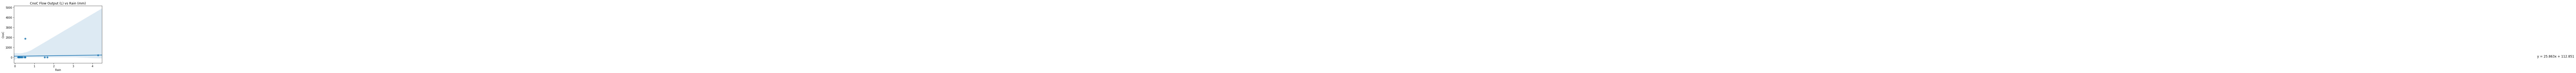

In [27]:
CnoC = graph('Rain', 'CnoC')
CnoC

Run the cell below to graph the AC rain events. Replace 'Rain' with the column name containing rain data, and 'AnoC' with the columnn name containing AnoC flow data. Make sure to use quotes.

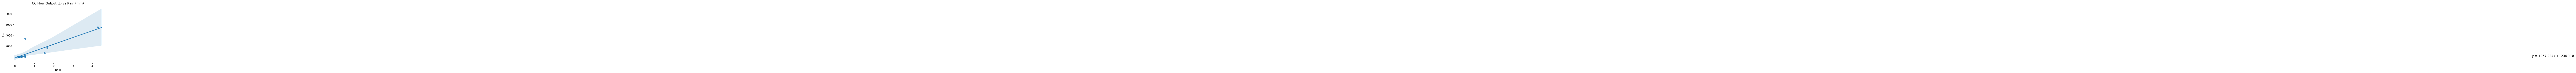

In [28]:
CC = graph('Rain', 'CC')
CC